In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv

In [2]:
result=pd.read_csv('diff.csv')
#print(result)
type(result)
mat=result.values.tolist()
#print(mat)
type(mat)

list

In [3]:
G=nx.Graph() #undirected graph
state_set=['ANI','AP','AP','ASSM','Bihar','Chandi','CHTG','DLH','Goa','Guj','Har','HP','JK','Jhar','KNTK','Ker','LDK','MP','Mah','Man','Miz','OD','PDC','Pun','Raj','TN','Tel','Trp','UP','UK','WB']
for each in state_set:
    G.add_node(each)
#print(G.nodes())
#nx.draw(G,with_labels=1)
#plt.show()        
count=0
#add edges
#print(G.nodes())
for i in range(30):
    for j in range(31):
        if(i!=j):
            if(mat[i][j]==1 and G.has_edge(i,j)==0):
                G.add_edge(state_set[i],state_set[j])
                count=count+1
nx.write_gml(G,'Covid-19_network.gml')
#nx.draw(G,pos,with_labels=1)
#nx.draw_networkx_edge_labels(G,pos)
#plt.show()
#print(G.nodes())
print("No of edges:",count)
print("NO of nodes:",G.number_of_nodes())
#print(nx.pagerank(G))

No of edges: 464
NO of nodes: 30


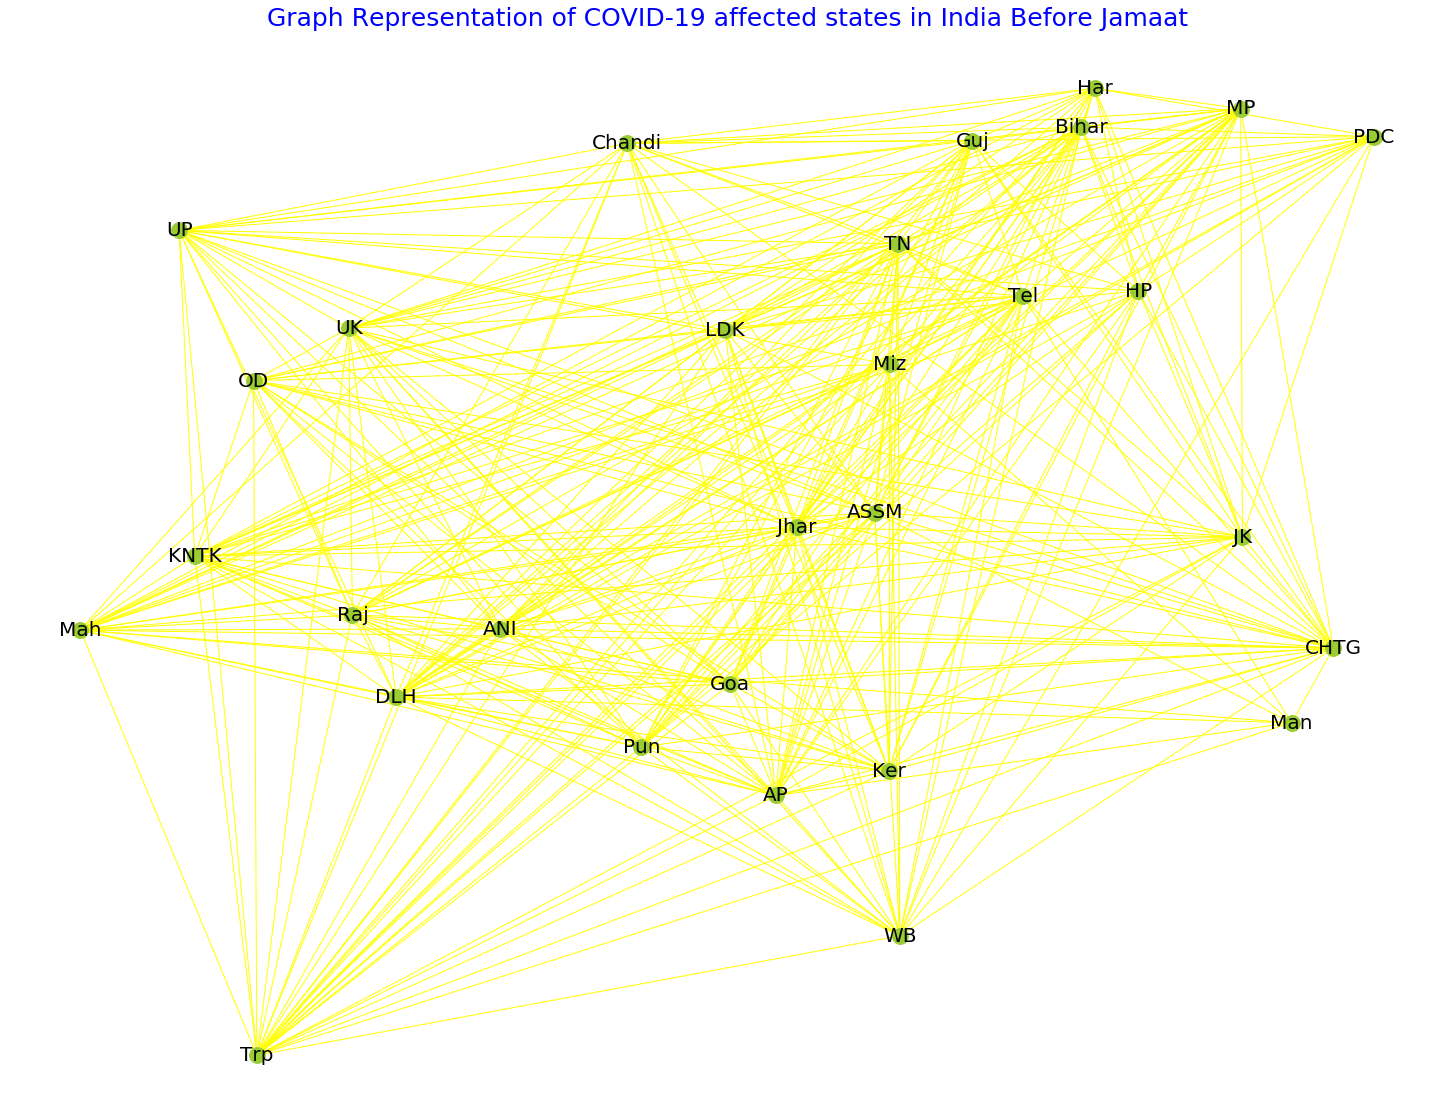

In [4]:
#node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in G.nodes(data=True)}
pos=nx.random_layout(G)
plt.figure(figsize=(20,15))
nx.draw(G, pos, with_labels=1,edge_color='yellow', node_size=250, node_color='yellowgreen',font_size=20,font_color='black')
plt.title('Graph Representation of COVID-19 affected states in India Before Jamaat', size=25,color='Blue')
plt.show()

In [5]:
d = nx.pagerank(G)
#print(d)
mx=0
i=0
print ("{:<8} {:<35} {:<25}".format('No','State/Union Territory','PageRank'))
for k, v in d.items():
    pagerank= v
    if(pagerank>mx):
        mx=pagerank
        state=k
    i=i+1
    print ("{:<8} {:<35} {:<25}".format(i,k,pagerank))
print("\n{} has the highest Pagerank: {}".format(state,mx))
print("Hence Delhi can be most dangerous state in terms of becoming a vector.")

No       State/Union Territory               PageRank                 
1        ANI                                 0.0325420559290275       
2        AP                                  0.040474610866908914     
3        ASSM                                0.039226597929005735     
4        Bihar                               0.033942860865118475     
5        Chandi                              0.03006269719650649      
6        CHTG                                0.03922100265230109      
7        DLH                                 0.040584905984835995     
8        Goa                                 0.029909662627653863     
9        Guj                                 0.03259358781940482      
10       Har                                 0.0288926349684197       
11       HP                                  0.027649672542665846     
12       JK                                  0.030100901761055295     
13       Jhar                                0.03894961406897551      
14    

In [7]:
pr= open("outputs/pagerank.csv", "w")
writer = csv. writer(pr)
writer. writerow(['State/Union Territory','PageRank'])
for key, value in d. items():
    writer. writerow([key, value])
pr. close()